<a href="https://colab.research.google.com/github/06ayushm/Calorie-burnt-prediction/blob/main/calories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing dependencies

# New Section

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data collection and processing

In [36]:
#loading a data from cs file tp pandas dataframe
calories = pd.read_csv('/content/calories.csv')

In [37]:
#printing first five dataset of a file imported in pandas
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [38]:
#importing exercise file in pandas
exercise_data = pd.read_csv('/content/exercise.csv')

In [39]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


combining the two dataframes

In [40]:
calories_data = pd.concat([exercise_data,calories['Calories']],axis=1)

In [41]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [42]:
#checking the no. of rows and columns is a dataframe:
calories_data.shape

(15000, 9)

data analysis

In [43]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


data visualization

In [44]:
sns.set()

plotting the gender column in countplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


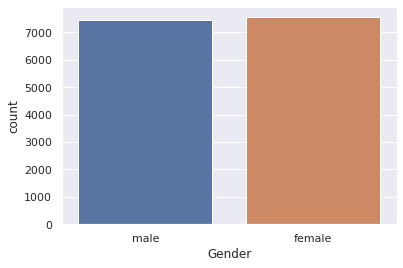

In [45]:
sns.countplot(calories_data['Gender'])

finding the distribution plot of age.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


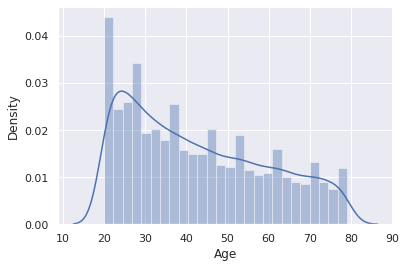

In [46]:
#distribution plot of age.
sns.distplot(calories_data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


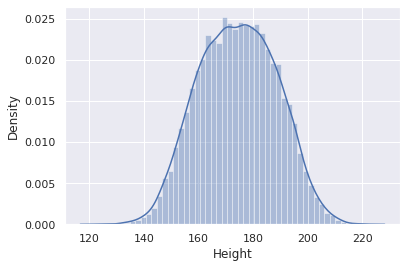

In [47]:
#distribution plot of Height.
sns.distplot(calories_data['Height'])

conmstructing heat map

In [48]:
correlation = calories_data.corr()

In [49]:
#constructing the ,map

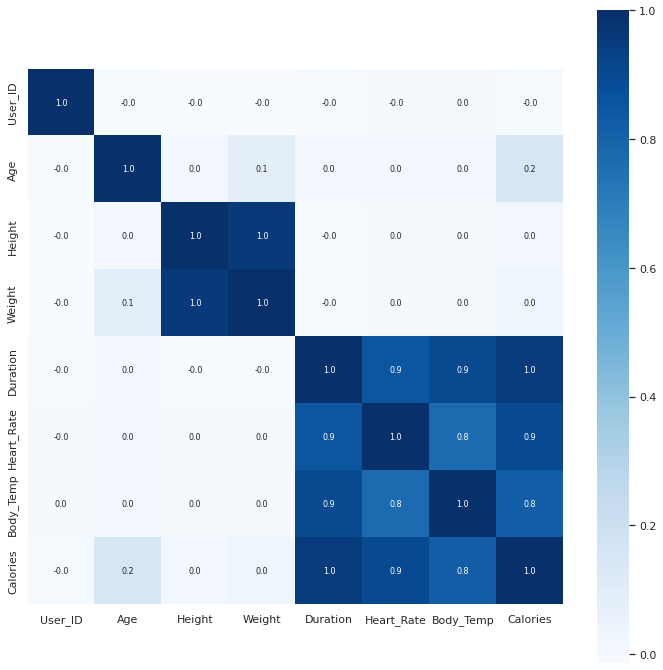

In [50]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Replacing the text data into neurmaric value....

In [51]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [52]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [53]:
print(calories_data)

        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1      14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2      11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3      16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4      17771927       1   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082       1   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577       1   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188       1   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037       0   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526       0   63   173.0    79.0      18.0        92.0       40.5   

       Calories  
0        

separating features and target

In [54]:
x=calories_data.drop(columns=['User_ID','Calories'],axis=1)
y=calories_data['Calories']

In [55]:
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [56]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


splitting the data into training data and testing data

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [58]:
print(x.shape,x_train.shape,x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [59]:
x_train.describe()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000
mean,0.504750,42.650750,174.421083,74.909750,15.549583,95.52525,40.028008
std,0.499998,16.950257,14.264661,15.043375,8.326943,9.61825,0.779888
min,0.000000,20.000000,123.000000,36.000000,1.000000,67.00000,37.200000
25%,0.000000,28.000000,164.000000,63.000000,8.000000,88.00000,39.600000
50%,1.000000,39.000000,174.000000,74.000000,16.000000,96.00000,40.200000
75%,1.000000,56.000000,185.000000,86.000000,23.000000,103.00000,40.600000
max,1.000000,79.000000,222.000000,128.000000,30.000000,128.00000,41.500000


model training

XGBoost Regressor

In [60]:
#loading the model
model= XGBRegressor()

In [61]:
#training the model with x_train
model.fit(x_train,y_train)

[09:42:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation of our model

prediction ofn the test dATA

In [62]:
test_data_prediction=model.predict(x_test)

In [63]:
print(test_data_prediction)

[129.06204  223.79721   39.181965 ... 145.59767   22.53474   92.29064 ]


In [64]:
model.score

<bound method RegressorMixin.score of XGBRegressor()>

mean absolute error

In [65]:
mae=metrics.mean_absolute_error(y_test,test_data_prediction)

In [66]:
print("mean absolute error = ", mae)

mean absolute error =  2.7159012502233186
